<a href="https://colab.research.google.com/github/Rusulabbas/219-FINAL/blob/main/Presentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kmodes
from kmodes.kprototypes import KPrototypes
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from itertools import combinations
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_predict
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix

In [2]:
url = 'https://raw.githubusercontent.com/Rusulabbas/219-FINAL/main/ObesityDataSet.csv'
df = pd.read_csv(url)

#dropping all na values
df=df.dropna()
df.drop(['Age'], axis=1)

,Gender,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


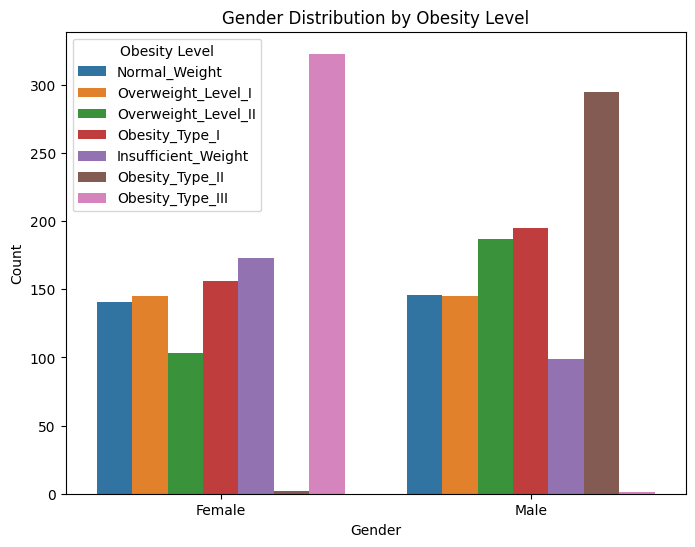

In [3]:
plt.figure(figsize=(8, 6)) #Size of the figure
sns.countplot(data=df, x='Gender', hue='NObeyesdad') #Creating a countplot to visualize the distribution of SCC by obesity level
plt.title('Gender Distribution by Obesity Level')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Obesity Level')

plt.show()

Gender Vs Count
1. Female Key points:
- The highest counts are in obesity "Overweight_Level_Il" and "Insufficient_Weight"
- "Overweight_Level_II" and "Normal_Weight" have the low values
- The "Obesity_Type_IlI" category has the lowest count in total
2. Male Key Points:
- - "Obesity_Type_IlI," is higher than the female count.
- "Obesity_Type_I," is the second highest among males
- "Obesity_Type_II" has fewer individuals than the overweight categories.
- "Obesity_Type_III" has the lowest count in total for all males
3. Overall, the chart shows that:
- For both genders, "Normal_Weight" have similar counts
- Male count seems to have a higher count for most of the obesity levels.
This graph can help by showing the frequency of different obesity levels between Male and Female.


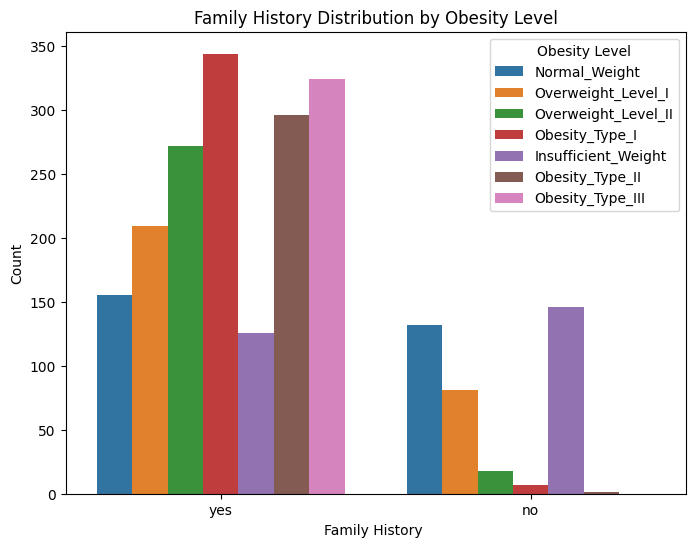

In [4]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='family_history_with_overweight', hue='NObeyesdad') #Creating a countplot to visualize the distribution of family_history_with_overweight by obesity level
plt.title('Family History Distribution by Obesity Level')
plt.xlabel('Family History ')
plt.ylabel('Count')
plt.legend(title='Obesity Level')
plt.show()

Family History VS Count

Key points:
1. Family History - Yes:
- "Obesity_Type_I" has the highest count.
- "Obesity_Type_II" and "Obesity_Type_III"  both has high counts besides “Obesity_Type_I”
- The counts for "Overweight_Level_lI", "Insufficient_Weight", have the lowest count compared to the rest of the obesity levels.
2. Family History - No:
- "Insufficient_Weight" category has the highest count against all the groups
- "Normal_Weight" comes in as second highest with family history without being overweight.
- The lowest counts for no family history with overweight are “Obesity_Type_III”,”Obesity_Type_II” “Obesity_Type_I” with ”Obesity_Type_II” being the lowest.
3. The graph shows that there is probably a relationship between high obesity levels and a family history of being overweight.  For example, most of the yes responses have "Obesity_Type_l"


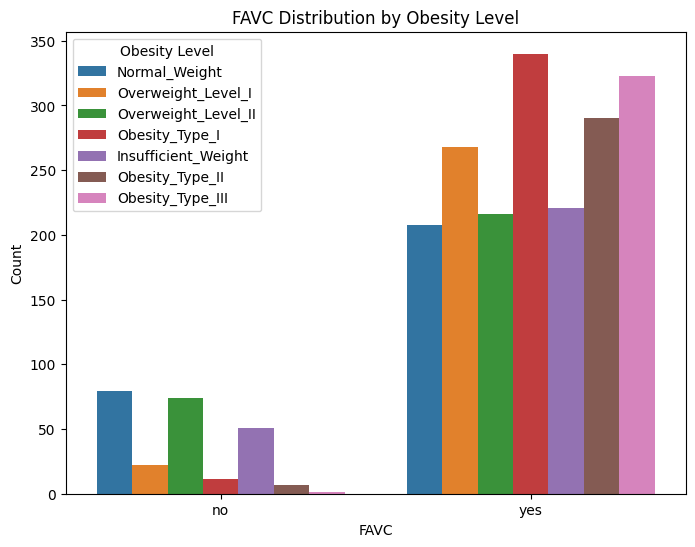

In [5]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='FAVC', hue='NObeyesdad') #Creating a countplot to visualize the distribution of FAVC by obesity level
plt.title('FAVC Distribution by Obesity Level')
plt.xlabel('FAVC')
plt.ylabel('Count')
plt.legend(title='Obesity Level')
plt.show()

Requently consume high caloric food (FAVC) vs. Count
Key Points:

1. FAVC - No:
- The "Normal_Weight" category has the highest count
- The other categories, including "Obesity_Type_III," "Obesity_Type_II," have the least count for frequent consumption of high calorie food

2. FAVC - Yes:
- The "Obesity_Type_I" category has the highest count
- The "Normal_Weight" category has a lower count compared to all obesity levels.
- "Insufficent_Weight", "Overweight_Level_II," and "Normal_Weight" have about the same frequency of high calorie food.
3. The bar chart shows high-calorie food intake across the different obesity levels. This data gives evidence to the that nutrition, the frequency with high-calorie  can play an important part in obesity.


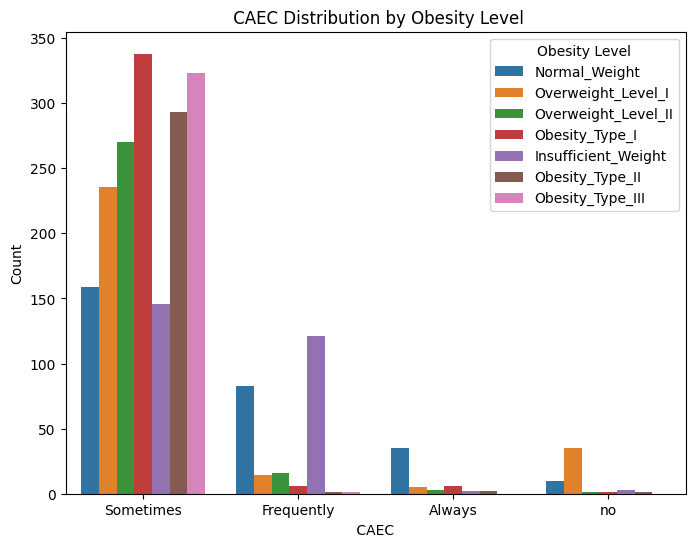

In [6]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='CAEC', hue='NObeyesdad') #Creating a countplot to visualize the distribution of CAEC by obesity level
plt.title('FAVC Distribution by Obesity Level')
plt.title(' CAEC Distribution by Obesity Level')
plt.xlabel(' CAEC ')
plt.ylabel('Count')
plt.legend(title='Obesity Level')
plt.show()

Consumption of Food between Meals vs Count
Key Points:
1. Sometimes:
- "Obesity_Type_I" and “Overweight_Level_II” has the highest count between the counts of 300-350
- The "Insufficient_Weight" has the lowest count at about 150
2. Frequently:
- The "Insufficient_Weight" category has the highest count at slightly under 150
- Counts for ""Obesity_Type_Il" "Obesity_Type_Il," have the lowest found at close to 0
3. Always:
- The counts for all variables are low, the highest being “Normal_Weight” at under 50 counts
4. No:
- Overall, the no responses has the lowest out of all answers with below 150 “Overweight_Level_l” being the highest at under 50 counts
5. The graph shows a pattern that obese people eat more often. The information shows a relationship between higher obesity rates and more frequent eating between meals.


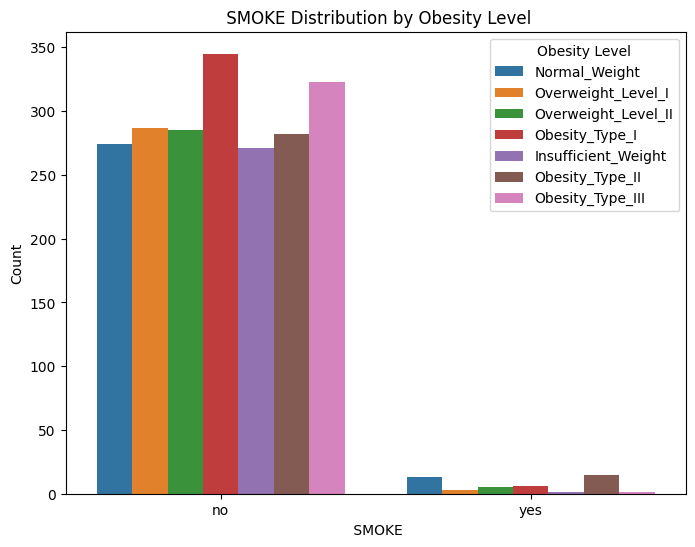

In [7]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='SMOKE', hue='NObeyesdad') #Creating a countplot to visualize the distribution of SMOKE by obesity level
plt.title(' SMOKE Distribution by Obesity Level')
plt.xlabel(' SMOKE')
plt.ylabel('Count')
plt.legend(title='Obesity Level')
plt.show()

Smoking with Overweight vs. Count
Key observations:
1. Non-Smokers (no):
- "Obesity_Type_I" has the highest slightly below 350
- “Normal_Weight” has the lowest count at compared to call in the middle of 200 - 300
- "Overweight_Level_l", "Overweight_Level_ll", and "Insufficient_Weight" are all fairly equal to each other at slightly under 300.

2. Smokers (yes):
- The counts for all Obesity Levels are fairly low.
- "Obesity_Type_Il" and “Normal_Weight” individuals have the highest compared to the rest but still under 50.
“- Insufficient_Weight” and “Obesity_Type_lll” have the lowest counts close to zero.

3. This graph shows nonsmokers are more common than smokers at all obesity levels. This also shows that smoking could possibly not be the best predictor as both responses had a spread out relationship


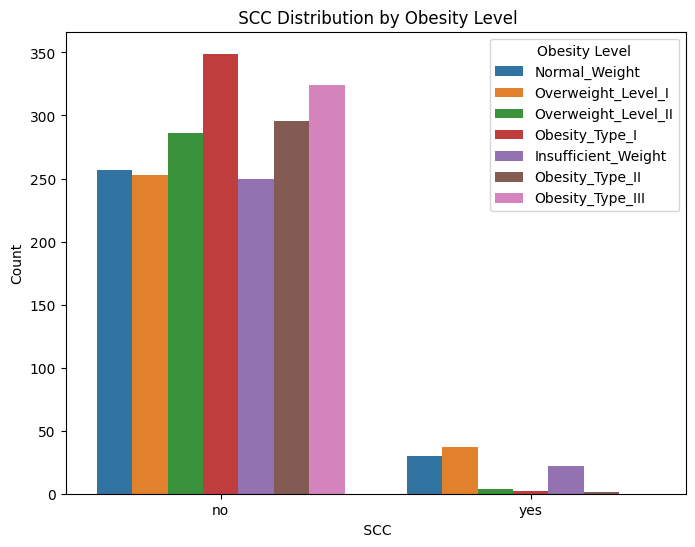

In [8]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='SCC', hue='NObeyesdad')
plt.title(' SCC Distribution by Obesity Level')
plt.xlabel(' SCC')
plt.ylabel('Count')
plt.legend(title='Obesity Level')
plt.show()


 Self-Monitoring of Caloric Consumption. (SCC) vs. Counts
Key Points.
1. SCC - No:
- The "Obesity_Type_I" category has the highest count at nearly 350
- "Obesity_Type_III" and "Obesity_Type_II" categories have the next highest counts. Both between 300 and 350
- “Insufficient_Weight has the lowest count at about 250
2. SCC - Yes:
- Across all obesity types, the counts are fairly low are 50 counts or less
- "Obesity_Type_III" and - "Obesity_Type_II" categories have the lowest counts at close to zero.

 3. Keeping track of calories is not something the majority of people do. Especially those who were obese. This data shows the value of calorie tracking as a weight control strategy, which may be helpful for health efforts and predicting obesity


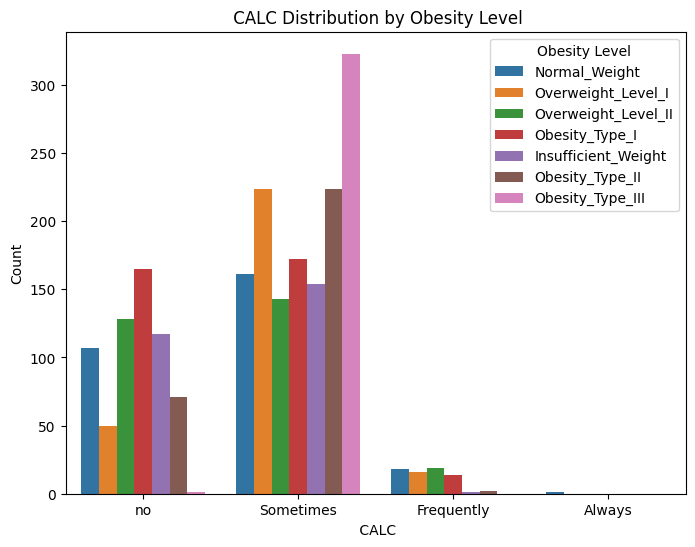

In [9]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='CALC', hue='NObeyesdad')#Creating a countplot to visualize the distribution of CALC by obesity level
plt.title(' CALC Distribution by Obesity Level')
plt.xlabel(' CALC')
plt.ylabel('Count')
plt.legend(title='Obesity Level')
plt.show()

Alcohol consumption habits Vs. Counts  (CALC).
Key Points:
1. No Alcohol Consumption (no):
- The "Obesity_Type_l" category has the highest count in the middle of 150 and 200
- "Overweight_Level_lI" and "Insufficient_Weight" have the next highest counts both under 150
- "Obesity_Type_III" has the lowest count at close to zero.
2. (Sometimes):
- "Obesity_Type_Ill" has the highest count
- "Overweight_Level_I" and “Obesity_Type_II” seem to have equal counts at about 200
- "Insufficient_Weight" has the lowest count compared to the rest.

3. Frequent Alcohol Consumption (Frequently):
- All counts are below 50
- “Normal_Weight”,”Overweight_level_l”, “Obesity_Type_I”, and Overweight_Level_I. All have similar counts.
- “Insufficient_Weight” and “Obesity_Type_Ill” have the lowest at zero count

4. Regular Alcohol Consumption (Always):
- Almost all of the obesity levels are close to zero.
- “Normal_Weight” is the highest.

5. This graph shows the alcohol consumption levels of all obesity levels. This is important to show if alcohol has an impact on obesity level.


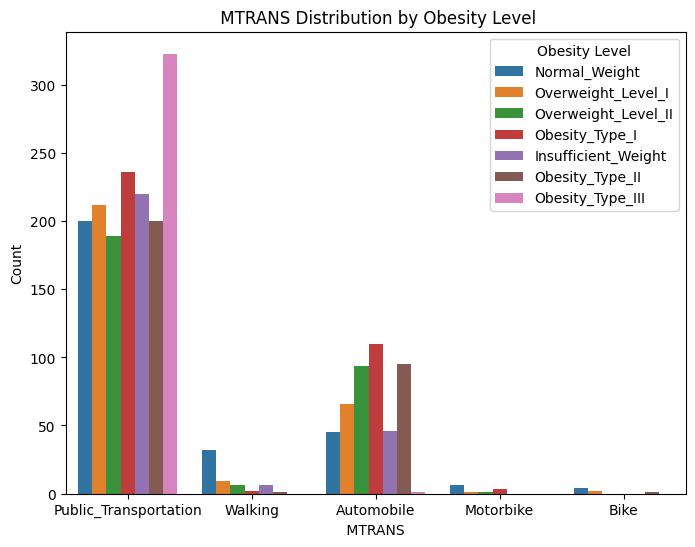

In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='MTRANS', hue='NObeyesdad') #Creating a countplot to visualize the distribution of MTRANS by obesity level
plt.title(' MTRANS Distribution by Obesity Level')
plt.xlabel(' MTRANS ')
plt.ylabel('Count')
plt.legend(title='Obesity Level')
plt.show()

Main form of transportation (MTRANS). V.S Count

Key Points:
1. Public Transportation:
- The "Obesity_Type_Ill" group has the highest count at above 300
-"Overweight_Level_II" has the lowest count at barley under 200
2. Walking:
- All levels of obesity have low counts in walking, all under 50 counts.
- "Normal_Weight" individuals have the highest count at about 30
- The lowest counts are within “Obesity_Type_lll” and “Obesity_Type_ll” at about zero.
3. Automobile:
- Seems to be the second most used form of transportation
- “Obesity_Type_l” and “Obesity_Type_ll” have the highest count
- “Obesity_Type_lll” has the lowest count.
4. Motorbike:
- All counts are low, below 50
- “Normal_Weight” and “Obesity_Type_l” have the highest at about 10
- The rest are at nearly zero
5. Bike:
- Biking has the least count compared to all forms of transportation.
- “Normal_Weight” has the highest at about 5
- The rest are nearly zero
6. This chart shows that the main form of transportation from all levels of obesity is public transportation. The most unused form of transportation is bikes. This is helpful to see the correlation between transportation and obesity level.


# Clustering

In [11]:
#Defining a column transformer using make_column_transformer
scaled = make_column_transformer(
    (StandardScaler(), ['Height','Weight', 'FCVC', 'NCP','CH2O', 'FAF', 'TUE']), #Scaling numerical features using StandardScaler
    (OneHotEncoder(handle_unknown='ignore'), ['Gender', 'family_history_with_overweight' ,'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad'])#Encoding categorical features using OneHotEncoder
)
df_array = scaled.fit_transform(df) #storing the transformed data in 'df_array'
df_array

array([[-0.87558934, -0.86255819, -0.7850187 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.94759928, -1.16807699,  1.08834176, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.05402854, -0.36609013, -0.7850187 , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.54167211,  1.79886776,  1.08834176, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.40492652,  1.78577968,  1.08834176, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.39834438,  1.7905916 ,  1.08834176, ...,  1.        ,
         0.        ,  0.        ]])

In [12]:
data = scaled.transform(df)
pca = PCA(n_components=2) #creating a pca with 2 principal components
pca.fit(data) #fitting pca to the trasformed data
data_pca = pca.transform(data) #transforming the data to the new pca space
data_pca = pd.DataFrame(data_pca, columns=['PC1', 'PC2']) #creating a DataFrame from the transformed pca data with column names PC1 and PC2
data_pca.head(10) #Displaying the first 10 rows of the DataFrame

,PC1,PC2
0,1.572311,0.320295
1,0.739732,0.064238
2,-0.800498,1.880353
3,-0.972983,0.335226
4,0.447716,-0.311315
5,1.413837,0.217437
6,1.815397,-1.085795
7,0.589997,1.872304
8,-0.412963,0.442189
9,0.132260,1.325471


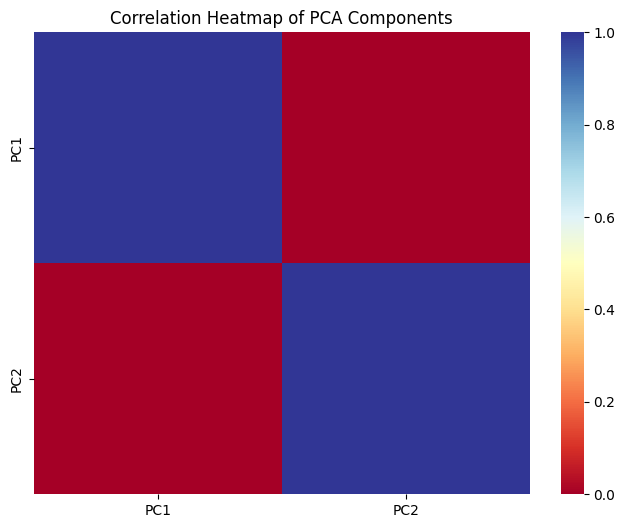

In [13]:
plt.figure(figsize=(8, 6))#Specifing the size of the  figure
# Creating a heatmap of the correlation matrix of the PCA components DataFrame 'data_pca'
# cmap='RdYlBu' sets the color map for the heatmap
sns.heatmap(data_pca.corr(), cmap='RdYlBu')
plt.title('Correlation Heatmap of PCA Components') #title
plt.show()

In the heatmap, the blue squares on the diagonal, showing 'PC1' with 'PC1' and 'PC2' with 'PC2', suggest a perfect positive correlation of 1, which normal in a correlation matrix because each variable is perfectly correlated with itself. whereas, the red square intersecting 'PC1' and 'PC2' shows little to no correlation between the two principal components, confirming the effectiveness of PCA.

In [14]:
# Initializing the KPrototypes algorithm for clustering
# n_clusters: This sets the number of groups (clusters) that we want the algorithm to find.
# verbose: This controls how much information the algorithm prints during its process. Setting it to 2 means we'll see more details.
# max_iter: This sets the maximum number of times the algorithm will adjust the clusters to find the best fit.
kproto = KPrototypes(n_clusters=3, verbose =2, max_iter=20)
# Fitting the KPrototypes model to our data
# In our data, we have both numerical and categorical information.
cluster = kproto.fit_predict(df_array, categorical=[0, 4,5,6,7,8,9,10,11,12,13,14,15,16])

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 486, ncost: 8975.850466798705
Run: 1, iteration: 2/20, moves: 209, ncost: 8842.491492759244
Run: 1, iteration: 3/20, moves: 146, ncost: 8741.790245672184
Run: 1, iteration: 4/20, moves: 177, ncost: 8470.06227017482
Run: 1, iteration: 5/20, moves: 74, ncost: 8450.622499007834
Run: 1, iteration: 6/20, moves: 13, ncost: 8449.073611064694
Run: 1, iteration: 7/20, moves: 10, ncost: 8448.48732382271
Run: 1, iteration: 8/20, moves: 2, ncost: 8448.459966057027
Run: 1, iteration: 9/20, moves: 0, ncost: 8448.459966057027
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 361, ncost: 8466.988327303969
Run: 2, iteration: 2/20, moves: 58, ncost: 8452.731662322592
Run: 2, iteration: 3/20, moves: 14, ncost: 8451.085382113062
Run: 2, iteration: 4/20, moves:

In [15]:
# Printing the cluster centroids found by the KPrototypes algorithm
# Cluster centroids are the representative points of each cluster.
# They are the average values of the features within each cluster
print(kproto.cluster_centroids_)

[[ 1.22754617e+00  6.88257630e-01  3.43677863e-01  9.74137931e-01
   2.58620690e-02  1.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  9.51724138e-01  4.82758621e-02  1.34482759e-01
   1.72413793e-03  0.00000000e+00  8.62068966e-01  1.72413793e-03
   0.00000000e+00  0.00000000e+00  7.58620690e-02  3.63793103e-01
   5.58620690e-01  0.00000000e+00  1.72413793e-03  5.18023573e-01
  -1.64490507e+00 -1.18803911e+00 -1.08062463e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
   1.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00]
 [-4.91887264e-01 -3.13337414e-01  5.11912010e-01  9.81064022e-01
   1.89359784e-02  9.32371506e-01  6.76284941e-02  0.00000000e+00
   4.86925158e-02  5.65374211e-01  3.85933273e-01  2.62398557e-01
   5.41027953e-03  8.11541930e-03  6.84400361e-01  3.96753832e-02
   1.98376916e-01  2.11902615e-01  1.77637511e-01  4.50856628e-02
   0.00000000e+00  1.81244364e-01  1.85752931e-01 -1.7981

In [ ]:
# Creating an empty list to store cluster assignments
cluster_dict = []
#Iterating through each cluster assignment obtained from the clustering algorithm
for c in cluster:
  cluster_dict.append(c)
cluster_dict

In [17]:
# Add the cluster column from df to data_pca

df['cluster'] = cluster_dict
data_pca['cluster'] = df['cluster']
# Creatng an interactive scatter plot of PC1 vs PC2
fig = px.scatter(data_pca, x='PC1', y='PC2', color='cluster',
                 title='Interactive Scatter Plot: PC1 vs PC2',
                 labels={'PC1': 'Principal Component 1 (PC1)', 'PC2': 'Principal Component 2 (PC2)'},
                 hover_data={'PC1': True, 'PC2': True, 'cluster': False})
fig.show()

The interactive scatter plot visualizes the data points in terms of their first two main components, PC1 and PC2, with each point's location showing its value for these components. Hovering over the points shows their specific PC1 and PC2 values, but not their cluster. This graphic helps with analyzing the distribution and separation of data inside the PCA-reduced feature space, providing insights into the clustering achieved by the KPrototypes method.


In [18]:
# Filtering the DataFrame 'df' to include only rows where the value in the 'cluster' column is equal to 0
# This means we're selecting data points that belong to cluster 0
df[df['cluster']==0].head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,cluster
10,Male,26.0,1.85,105.0,yes,yes,3.0,3.0,Frequently,no,3.0,no,2.0,2.0,Sometimes,Public_Transportation,Obesity_Type_I,0
90,Female,25.0,1.63,93.0,no,no,3.0,4.0,Always,no,1.0,no,2.0,0.0,no,Public_Transportation,Obesity_Type_II,0
134,Male,30.0,1.77,109.0,yes,yes,3.0,3.0,Sometimes,no,1.0,no,2.0,0.0,Sometimes,Automobile,Obesity_Type_I,0
165,Male,30.0,1.92,130.0,yes,no,2.0,3.0,Sometimes,yes,1.0,no,1.0,0.0,Sometimes,Public_Transportation,Obesity_Type_II,0
197,Male,41.0,1.75,118.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Bike,Obesity_Type_II,0
202,Female,26.0,1.56,102.0,yes,yes,3.0,3.0,Sometimes,yes,1.0,no,0.0,1.0,Sometimes,Public_Transportation,Obesity_Type_III,0
225,Male,25.0,1.83,121.0,yes,no,3.0,3.0,Sometimes,no,3.0,no,2.0,0.0,Sometimes,Walking,Obesity_Type_II,0
229,Male,32.0,1.75,120.0,yes,no,3.0,3.0,Sometimes,no,3.0,no,0.0,2.0,no,Automobile,Obesity_Type_II,0
305,Male,23.0,1.75,120.0,yes,yes,2.0,3.0,Sometimes,yes,2.0,no,2.0,1.0,Sometimes,Public_Transportation,Obesity_Type_II,0
329,Female,19.0,1.65,82.0,yes,yes,3.0,3.0,Sometimes,no,1.0,no,0.0,1.0,Sometimes,Public_Transportation,Obesity_Type_I,0


In [19]:
# Filtering the DataFrame 'df' to include only rows where the value in the 'cluster' column is equal to 1
# This means we're selecting data points that belong to cluster 1
df[df['cluster']==1].head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,cluster
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,1
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,1
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,1
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,1
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight,1
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight,1
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,1
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight,1
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight,1
11,Female,21.0,1.72,80.0,yes,yes,2.0,3.0,Frequently,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Overweight_Level_II,1


In [20]:
# Filtering the DataFrame 'df' to include only rows where the value in the 'cluster' column is equal to 2
# This selects data points that belong to cluster 2
df[df['cluster']==2].head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,cluster
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,2
14,Male,23.0,1.77,60.0,yes,yes,3.0,1.0,Sometimes,no,1.0,no,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight,2
16,Male,27.0,1.93,102.0,yes,yes,2.0,1.0,Sometimes,no,1.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,2
17,Female,29.0,1.53,78.0,no,yes,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,no,Automobile,Obesity_Type_I,2
19,Female,23.0,1.65,70.0,yes,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I,2
21,Female,52.0,1.69,87.0,yes,yes,3.0,1.0,Sometimes,yes,2.0,no,0.0,0.0,no,Automobile,Obesity_Type_I,2
23,Female,22.0,1.60,82.0,yes,yes,1.0,1.0,Sometimes,no,2.0,no,0.0,2.0,Sometimes,Public_Transportation,Obesity_Type_I,2
26,Male,21.0,1.70,65.0,yes,yes,2.0,1.0,Frequently,no,2.0,no,1.0,2.0,Always,Walking,Normal_Weight,2
31,Female,31.0,1.58,68.0,yes,no,2.0,1.0,Sometimes,no,1.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,2
33,Male,39.0,1.79,90.0,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,2


# CLASSIFICATION

In [21]:
#Storing the catagorical variables in a datafame
features_cat = df[['Gender', 'family_history_with_overweight', 'FAVC','CAEC','SMOKE','SCC', 'MTRANS','CALC']]
features_cat

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,MTRANS,CALC
0,Female,yes,no,Sometimes,no,no,Public_Transportation,no
1,Female,yes,no,Sometimes,yes,yes,Public_Transportation,Sometimes
2,Male,yes,no,Sometimes,no,no,Public_Transportation,Frequently
3,Male,no,no,Sometimes,no,no,Walking,Frequently
4,Male,no,no,Sometimes,no,no,Public_Transportation,Sometimes
...,...,...,...,...,...,...,...,...
2106,Female,yes,yes,Sometimes,no,no,Public_Transportation,Sometimes
2107,Female,yes,yes,Sometimes,no,no,Public_Transportation,Sometimes
2108,Female,yes,yes,Sometimes,no,no,Public_Transportation,Sometimes
2109,Female,yes,yes,Sometimes,no,no,Public_Transportation,Sometimes


In [22]:
listOfFeaturecombos = []
for features in combinations(features_cat, 4):
  print(features)
  list(features)

('Gender', 'family_history_with_overweight', 'FAVC', 'CAEC')
('Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE')
('Gender', 'family_history_with_overweight', 'FAVC', 'SCC')
('Gender', 'family_history_with_overweight', 'FAVC', 'MTRANS')
('Gender', 'family_history_with_overweight', 'FAVC', 'CALC')
('Gender', 'family_history_with_overweight', 'CAEC', 'SMOKE')
('Gender', 'family_history_with_overweight', 'CAEC', 'SCC')
('Gender', 'family_history_with_overweight', 'CAEC', 'MTRANS')
('Gender', 'family_history_with_overweight', 'CAEC', 'CALC')
('Gender', 'family_history_with_overweight', 'SMOKE', 'SCC')
('Gender', 'family_history_with_overweight', 'SMOKE', 'MTRANS')
('Gender', 'family_history_with_overweight', 'SMOKE', 'CALC')
('Gender', 'family_history_with_overweight', 'SCC', 'MTRANS')
('Gender', 'family_history_with_overweight', 'SCC', 'CALC')
('Gender', 'family_history_with_overweight', 'MTRANS', 'CALC')
('Gender', 'FAVC', 'CAEC', 'SMOKE')
('Gender', 'FAVC', 'CAEC', 'SCC')
('Gen

In [23]:
#DECISIONTREE
#Creating a pipeline for Decision Tree Classifier
pipeline_dt = make_pipeline(
    OneHotEncoder(handle_unknown='ignore'),
    DecisionTreeClassifier(random_state=0)
)

#Creating a dictionary to store the F1 scores for the features
f1_DT = {}

#Iterate over the feature combintions from 1 to 7
for size in range(1,8):
    for features in combinations(features_cat, size):
      ##preformiong a cross valadation and calcuatling F1 scores
        scores = cross_val_score(
            pipeline_dt, #Decision Tree pipeline
            X=df[list(features)],  #Features
            y=df['NObeyesdad'], #Target
            scoring='f1_macro', #Scoring
            cv=5 #number of folds
        )
        #storing the mean score for feature combination as a string
        f1_DT[str(list(features))] = scores.mean()

f1_DT

{"['Gender']": 0.12940955601797485,
 "['family_history_with_overweight']": 0.11103118868291853,
 "['FAVC']": 0.08534722114698859,
 "['CAEC']": 0.1721803701989196,
 "['SMOKE']": 0.04978080618588794,
 "['SCC']": 0.06309474331004827,
 "['MTRANS']": 0.12030189139905068,
 "['CALC']": 0.11054182682386993,
 "['Gender', 'family_history_with_overweight']": 0.26869269285687103,
 "['Gender', 'FAVC']": 0.20148307091540457,
 "['Gender', 'CAEC']": 0.3059784700461316,
 "['Gender', 'SMOKE']": 0.13463501688105992,
 "['Gender', 'SCC']": 0.16277877913160263,
 "['Gender', 'MTRANS']": 0.20527332114213856,
 "['Gender', 'CALC']": 0.20818459761616462,
 "['family_history_with_overweight', 'FAVC']": 0.160105102810688,
 "['family_history_with_overweight', 'CAEC']": 0.20136696122082043,
 "['family_history_with_overweight', 'SMOKE']": 0.12450436397598533,
 "['family_history_with_overweight', 'SCC']": 0.11005118087172203,
 "['family_history_with_overweight', 'MTRANS']": 0.20570124826907238,
 "['family_history_with_

In [24]:
#sorting the F1 scores in desending order and storing them as a series
f1_DT_sorted = pd.Series(f1_DT).sort_values(ascending=False)
f1_DT_sorted

['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SCC', 'MTRANS', 'CALC']      0.578565
['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'MTRANS', 'CALC']    0.562317
['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'MTRANS', 'CALC']             0.557977
['Gender', 'family_history_with_overweight', 'CAEC', 'SMOKE', 'SCC', 'MTRANS', 'CALC']     0.537799
['Gender', 'family_history_with_overweight', 'CAEC', 'SCC', 'MTRANS', 'CALC']              0.537437
                                                                                             ...   
['FAVC', 'SMOKE']                                                                          0.094444
['FAVC']                                                                                   0.085347
['SMOKE', 'SCC']                                                                           0.082850
['SCC']                                                                                    0.063095


In [25]:
#Getting the max F1 score from the sorted F1 scores from the Decision Tree model
bestf1_dt = [f1_DT_sorted.max()]
bestf1_dt

[0.5785654912513433]

The combination of features ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SCC', 'MTRANS', 'CALC'] has the highest F1 score of approximately 0.578565 in the Decision Tree model. Which is greater than the other models we have.

In [26]:
#creating a label for the confsuion matrix
labels = ["Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Insufficient_Weight", "Obesity_Type_II", "Obesity_Type_III"]

In [27]:
X = df[['Gender', 'family_history_with_overweight', 'FAVC','CAEC','SMOKE','SCC', 'MTRANS','CALC']] #features
y = df['NObeyesdad'] #Target
pipeline_dt #Decsion Tree pipline defined above
#getting prediction using cross val
y_pred = cross_val_predict( pipeline_dt , X , y, cv = 4 ) #
y_pred


array(['Overweight_Level_II', 'Normal_Weight', 'Overweight_Level_II', ...,
       'Obesity_Type_III', 'Obesity_Type_III', 'Obesity_Type_III'],
      dtype=object)

In [28]:
# gettting the confusion matrix using the actual target variable (y) and the predicted values (y_pred)

conf_matrix = confusion_matrix(y, y_pred)
conf_matrix

array([[206,  26,   5,  31,   1,   2,   1],
       [ 57, 129,  24,  18,  10,  21,  28],
       [  8,  16, 188,  87,  31,   4,  17],
       [ 15,   7,  55, 218,   1,   1,   0],
       [  0,   2,   0,   0, 321,   0,   1],
       [ 12,  35,  53,  72,  26,  87,   5],
       [ 30,  29,  28,  94,   5,  10,  94]])

In [29]:
#creating a datafrom from the confusion matrix
df_conf_matrix = pd.DataFrame(
    conf_matrix, #confsuion matrix
    index=labels, # row labels - true class labels
    columns=labels #column lables - prediction class labels
)

print(df_conf_matrix)

                     Normal_Weight  Overweight_Level_I  Overweight_Level_II  \
Normal_Weight                  206                  26                    5   
Overweight_Level_I              57                 129                   24   
Overweight_Level_II              8                  16                  188   
Obesity_Type_I                  15                   7                   55   
Insufficient_Weight              0                   2                    0   
Obesity_Type_II                 12                  35                   53   
Obesity_Type_III                30                  29                   28   

                     Obesity_Type_I  Insufficient_Weight  Obesity_Type_II  \
Normal_Weight                    31                    1                2   
Overweight_Level_I               18                   10               21   
Overweight_Level_II              87                   31                4   
Obesity_Type_I                  218                    1   

Below is the confusion matrix displayed above. However, due to the lengthy labels, Colab ran out of space to display the matrix in a user-friendly manner. So, we have recreated the matrix below for better visibility.

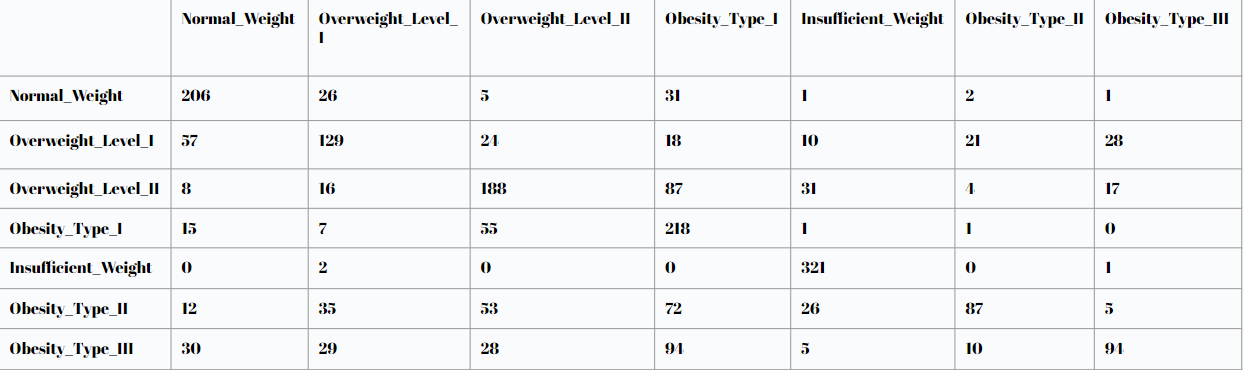

Each row of the matrix corresponds to the true classifications, while each column represents the model's predictions. "Insufficient Weight" is the top performer, with the model correctly identifying 321 people, demonstrating a strong match between the model's predictions and the actual class. However, the model didnt do so welll with "Obesity Type III," frequently misidentifying these people. This implies that the features used by the model might not have the specifications required to identify "Obesity Type III" from other similar categories.